In [9]:
from M1M3tools import *
from datetime import datetime
from datetime import timedelta
import os

import matplotlib.pyplot as plt
import MySQLdb as mdb
import numpy as np
import pandas as pd
from sqlalchemy import create_engine

from FATABLE import *
plt.style.use('classic')

%matplotlib inline

### What thermal tables do we have?

In [10]:
filename = 'efdData/table_thermal_list1.txt'
if not os.path.isfile(filename):
    fid = open(filename, 'w')
    tables = pd.read_sql_query('show tables', engine1)
    for table in tables['Tables_in_EFD']:
        if 'thermal' in table:
            print(table)
            fid.write('%s\n'%table)
    fid.close()
else:
    print('-------Reading from %s-------------'%filename)
    fid = open(filename, 'r')
    for line in fid:
        print(line.strip())
    fid.close()

-------Reading from efdData/table_thermal_list1.txt-------------
MTM1M3TS_thermalData


In [11]:
#What columns are in this table
table_name = 'MTM1M3TS_thermalData'
filename = 'efdData/thermal_column_list1.txt'
if not os.path.isfile(filename):
    fid = open(filename, 'w')
    descr = pd.read_sql_query('describe {}'.format(table_name), engine1)
    for fieldName in descr['Field']:
        print(fieldName)
        fid.write('%s\n'%fieldName)
    fid.close()
else:
    print('-------Reading from %s-------------'%filename)
    fid = open(filename, 'r')
    for line in fid:
        print(line.strip())
    fid.close()     

-------Reading from efdData/thermal_column_list1.txt-------------
date_time
private_revCode
private_sndStamp
private_rcvStamp
private_seqNum
private_origin
private_host
timestamp
thermocoupleScanner1_1
thermocoupleScanner1_2
thermocoupleScanner1_3
thermocoupleScanner1_4
thermocoupleScanner1_5
thermocoupleScanner1_6
thermocoupleScanner1_7
thermocoupleScanner1_8
thermocoupleScanner1_9
thermocoupleScanner1_10
thermocoupleScanner1_11
thermocoupleScanner1_12
thermocoupleScanner1_13
thermocoupleScanner1_14
thermocoupleScanner1_15
thermocoupleScanner1_16
thermocoupleScanner1_17
thermocoupleScanner1_18
thermocoupleScanner1_19
thermocoupleScanner1_20
thermocoupleScanner1_21
thermocoupleScanner1_22
thermocoupleScanner1_23
thermocoupleScanner1_24
thermocoupleScanner1_25
thermocoupleScanner1_26
thermocoupleScanner1_27
thermocoupleScanner1_28
thermocoupleScanner1_29
thermocoupleScanner1_30
thermocoupleScanner1_31
thermocoupleScanner1_32
thermocoupleScanner1_33
thermocoupleScanner1_34
thermocoupleSc

### Use the first timestamp in lsst_tc_190114.txt, read EFD, check against lsst_tc_190114.txt

In [12]:
bb = datetime.fromtimestamp(1547449243) #this is the first timestamp in lsst_tc_190114.txt
b1 = bb + timedelta(seconds = -20)
b2 = bb + timedelta(seconds = 20)
query = 'select * from {0} where {0}.date_time between \'{1}\' and \'{2}\';'.format(table_name, b1, b2)
print(query)

select * from MTM1M3TS_thermalData where MTM1M3TS_thermalData.date_time between '2019-01-14 00:00:23' and '2019-01-14 00:01:03';


In [13]:
filename = 'efdData/thermal_%s.csv'%(b1+(b2-b1)/2).strftime("%y%m%d_%H%M")
if not os.path.isfile(filename):
    df1 = pd.read_sql_query(query, engine1)
    df1.to_csv(filename)
else:
    print('-------Reading from %s-------------'%filename)
    df1 = pd.read_csv(filename,parse_dates=['date_time']) #make sure dtype for date_time column is understood

-------Reading from efdData/thermal_190114_0000.csv-------------


In [14]:
m = getEFDTMatrix(df1)

Number of Face Plate TCs = 31
Number of Back Plate TCs = 34


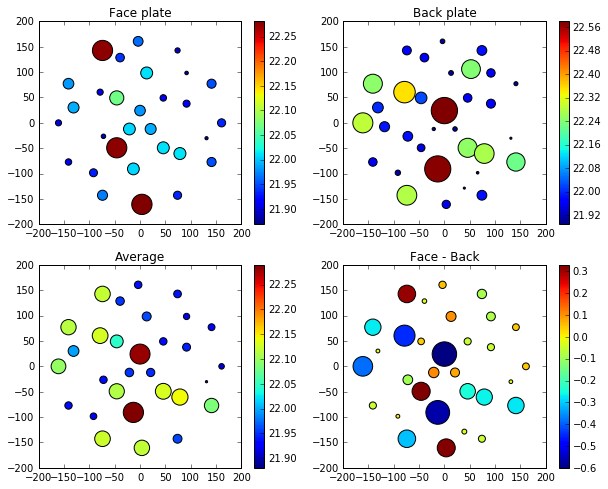

In [15]:
plotEFDT(m)

### What thermal table do we have for 2nd campaign?

In [70]:
filename = 'efdData/table_thermal_list2.txt'
if not os.path.isfile(filename):
    fid = open(filename, 'w')
    tables = pd.read_sql_query('show tables', engine2)
    for table in tables['Tables_in_EFD']:
        if 'thermal' in table:
            print(table)
            fid.write('%s\n'%table)
    fid.close()
else:
    print('-------Reading from %s-------------'%filename)
    fid = open(filename, 'r')
    for line in fid:
        print(line.strip())
    fid.close()

-------Reading from efdData/table_thermal_list2.txt-------------
MTM1M3TS_thermalData


In [72]:
#What columns are in this table
table_name = 'MTM1M3TS_thermalData'
filename = 'efdData/thermal_column_list2.txt'
if not os.path.isfile(filename):
    fid = open(filename, 'w')
    descr = pd.read_sql_query('describe {}'.format(table_name), engine2)
    for fieldName in descr['Field']:
        print(fieldName)
        fid.write('%s\n'%fieldName)
    fid.close()
else:
    print('-------Reading from %s-------------'%filename)
    fid = open(filename, 'r')
    for line in fid:
        print(line.strip())
    fid.close()     

-------Reading from efdData/thermal_column_list2.txt-------------
date_time
private_revCode
private_sndStamp
private_rcvStamp
private_seqNum
private_origin
private_host
timestamp
thermocoupleScanner1
thermocoupleScanner2
thermocoupleScanner3
thermocoupleScanner4


### For any instrument_channel thermal scanner, we plot temperature vs. time for each day

-------Reading from efdData/thermal_190114.csv-------------
-------Reading from efdData/thermal_190115.csv-------------
-------Reading from efdData/thermal_190116.csv-------------
-------Reading from efdData/thermal_190117.csv-------------
-------Reading from efdData/thermal_190118.csv-------------
-------Reading from efdData/thermal_190122.csv-------------
-------Reading from efdData/thermal_190123.csv-------------
-------Reading from efdData/thermal_190124.csv-------------
-------Reading from efdData/thermal_190125.csv-------------
-------Reading from efdData/thermal_190211.csv-------------
-------Reading from efdData/thermal_190212.csv-------------
-------Reading from efdData/thermal_190213.csv-------------
-------Reading from efdData/thermal_190214.csv-------------
-------Reading from efdData/thermal_190215.csv-------------
-------Reading from efdData/thermal_190218.csv-------------
-------Reading from efdData/thermal_190219.csv-------------
-------Reading from efdData/thermal_1902

Text(0.5, 0.95, 'Instrument 1, Channel 1')

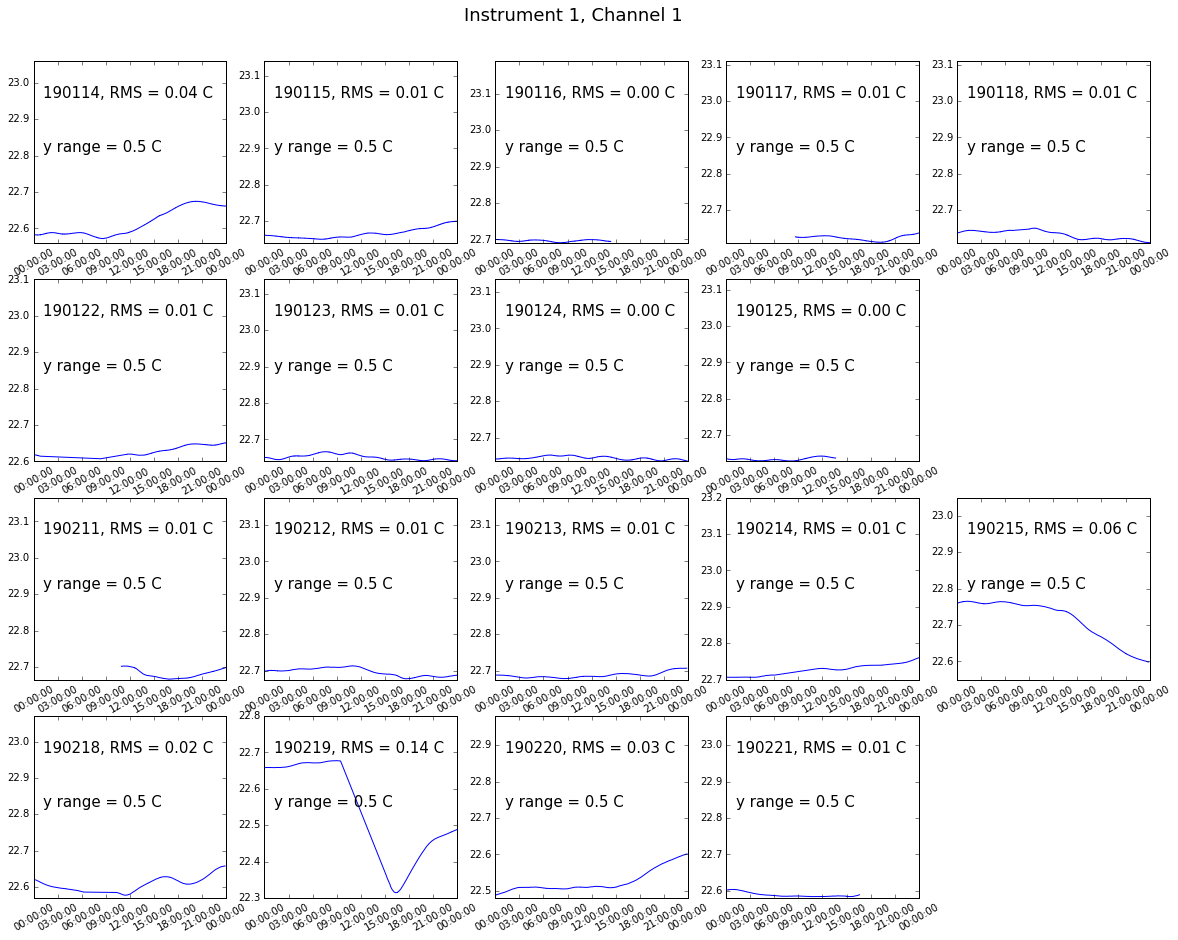

In [103]:
inst = 1
chan = 1
months = [1]*9 + [2]*9
days = [14, 15, 16, 17, 18, 22, 23, 24, 25, 11, 12, 13, 14, 15, 18, 19, 20, 21]

fig, ax = plt.subplots(4, 5, figsize=(20, 15))

for i in range(len(days)):
    b1 = datetime(2019, months[i], days[i], 7, 0, 0) #UTC is 7 hours ahead
    b2 = b1 + timedelta(days = 1)
    query = 'select * from {0} where {0}.date_time between \'{1}\' and \'{2}\';'.format(table_name, b1, b2)
    #print(query)
    filename = 'efdData/thermal_%s.csv'%(b1).strftime("%y%m%d")
    if not os.path.isfile(filename):
        if months[i]==1:
            df1 = pd.read_sql_query(query, engine1)
        else:
            df1 = pd.read_sql_query(query, engine2)
        df1.to_csv(filename)
    else:
        print('-------Reading from %s-------------'%filename)
        df1 = pd.read_csv(filename,parse_dates=['date_time']) #make sure dtype for date_time column is understood
    if months[i]==1:
        irow = np.int8(i/5)
        icol = np.mod(i,5)
        TvsTime = df1['thermocoupleScanner%d_%d'%(inst, chan)]
    else:
        irow = np.int8((i+1)/5)
        icol = np.mod((i+1),5)        
        TvsTime = [float(df1['thermocoupleScanner%d'%inst][ii].split()[chan-1]) 
                   for ii in range(len(df1['thermocoupleScanner%d'%inst]))]
    ax[irow][icol].plot(df1.date_time - timedelta(hours = 7), TvsTime)
    plt.setp(ax[irow][icol].xaxis.get_majorticklabels(), rotation=30)
    ax[irow][icol].get_yaxis().get_major_formatter().set_useOffset(False)
    ax[irow][icol].text(0.05, 0.8, '%s, RMS = %.2f C'%((b1).strftime("%y%m%d"), np.std(TvsTime)),
        transform=ax[irow][icol].transAxes, fontsize =15)
    bottom, top = ax[irow][icol].get_ylim()  # return the current ylim
    yrange = 0.5
    ax[irow][icol].set_ylim((bottom, bottom+yrange))
    ax[irow][icol].text(0.05, 0.5, 'y range = %.1f C'%(yrange),
        transform=ax[irow][icol].transAxes, fontsize =15)
    ax[irow][icol].set_xlim((b1- timedelta(hours = 7), b2- timedelta(hours = 7)))
fig.delaxes(ax.flatten()[-1]) 
fig.delaxes(ax.flatten()[-11]) 
#plt.tight_layout()
plt.suptitle('Instrument %d, Channel %d'%(inst, chan), x=0.5, y=0.95, fontsize=18)